<font color=#FF0000 size='6'>**pandas tutorial**</font>

# pandas
--------------


- **pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with **"relational"** or **"labeled"** data both easy and intuitive. 

- It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python. 

- Additionally, it has the broader goal of becoming **the most powerful and flexible open source data analysis / manipulation tool available in any language**. 


https://pandas.pydata.org/docs/index.html

### Main Features
-------------
Just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
    
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
    
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and let
    **`Series`, `DataFrame`**, etc. automatically align the data for you in
    computations.
    
  - Powerful, flexible group by functionality to perform split-apply-combine
    operations on data sets, for both aggregating and transforming data.
    
  - Make it easy to convert ragged, differently-indexed data in other Python
    and NumPy data structures into DataFrame objects.
    
  - Intelligent label-based slicing, fancy indexing, and subsetting of large
    data sets.
    
  - Intuitive merging and joining data sets.
  
  - Flexible reshaping and pivoting of data sets.
  
  - Hierarchical labeling of axes (possible to have multiple labels per tick).
  
  - Robust IO tools for loading data from flat files (CSV and delimited),
    Excel files, databases, and saving/loading data from the ultrafast HDF5
    format.
    
  - Time series-specific functionality: date range generation and frequency
    conversion, moving window statistics, date shifting and lagging.

In [1]:
import numpy as np
#import pandas
import pandas as pd # Let's import pandas with pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To print the installed vesion pandas
#help pd?
pd.__version__ 

'2.1.4'

 ## pandas Series data structure
-------------

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. 


In [4]:
pd.Series?

In [5]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
series = pd.Series([1000,"Ali",33.22, np.nan, True])
series

0     1000
1      Ali
2    33.22
3      NaN
4     True
dtype: object

If data is an `ndarray`, index must be the same length as data. If no index is passed, one will be created having values **[0, ..., len(data) - 1]**.

In [6]:
# List the index of the series
series.index

RangeIndex(start=0, stop=5, step=1)

In [7]:
# List the values (colums) of the series
print(series.values)

[1000 'Ali' 33.22 nan True]


In [8]:
# possible to change the index labels of a pandas Series object 
series.index = ["a", "b", "c", "d", "e"]
series

a     1000
b      Ali
c    33.22
d      NaN
e     True
dtype: object

In [9]:
list(series.index)

['a', 'b', 'c', 'd', 'e']

In [10]:
#The passed index is a list of axis labels. 
#Thus, this separates into a few cases depending on what data is:
series = pd.Series([1000,2000,3000], index=["Ali", "Veli", "Ayse"])
print(series)

Ali     1000
Veli    2000
Ayse    3000
dtype: int64


In [11]:
#Series can be instantiated from dicts:
dic = {"Ali": 67, "Veli":88, "Ayse":94, "Can":34, "Zeynep": 45}
series = pd.Series(dic)
series

Ali       67
Veli      88
Ayse      94
Can       34
Zeynep    45
dtype: int64

- Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [12]:
# display index 
series[0]

67

In [13]:
# display index 
series[-1]

45

In [14]:
series[-3:]

Ayse      94
Can       34
Zeynep    45
dtype: int64

In [15]:

series[0:2]

Ali     67
Veli    88
dtype: int64

- We will address array-based indexing like series[[3,1,0]] in section on indexing.

In [16]:
series[[3,1,0]]

Can     34
Veli    88
Ali     67
dtype: int64

In [17]:
series['Veli']

88

In [18]:
series[['Veli','Can']]

Veli    88
Can     34
dtype: int64

In [19]:
series['Ali':'Can']

Ali     67
Veli    88
Ayse    94
Can     34
dtype: int64

In [20]:
series["Veli":"Can"]=89
series

Ali       67
Veli      89
Ayse      89
Can       89
Zeynep    45
dtype: int64

In [21]:
series["Ayse"]=98
series

Ali       67
Veli      89
Ayse      98
Can       89
Zeynep    45
dtype: int64

In [22]:
series = pd.Series([1000,"Ali",33.22, np.nan, True])
series

0     1000
1      Ali
2    33.22
3      NaN
4     True
dtype: object

`isna()` and `isnull()` both do not detect empty strings ‘’. So you need to apply different functions to treat empty strings ‘’

In [23]:
series.isna()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [24]:
series.isnull()

0    False
1    False
2    False
3     True
4    False
dtype: bool

#### Series is dict-like
 - A ``Series`` is like a fixed-size `dict` in that you can get and set values by index label:

In [25]:
dic = {"Ali": 67, "Veli":88, "Ayse":94, "Can":34, "Zeynep": 45, "Zehra": 74}
series = pd.Series(dic)
series

Ali       67
Veli      88
Ayse      94
Can       34
Zeynep    45
Zehra     74
dtype: int64

In [26]:
#Return the largest `n` elements, default n=5
series.nlargest()

Ayse      94
Veli      88
Zehra     74
Ali       67
Zeynep    45
dtype: int64

In [27]:
series.nlargest(3)

Ayse     94
Veli     88
Zehra    74
dtype: int64

In [28]:
# can work with NumPy arrays
longSeries = pd.Series(np.random.randn(1000))
longSeries

0      0.310631
1      0.437905
2     -0.633385
3     -0.281202
4     -0.083918
         ...   
995   -1.407745
996    0.200501
997    0.349437
998    2.509936
999   -0.326852
Length: 1000, dtype: float64

In [29]:
longSeries.head()

0    0.310631
1    0.437905
2   -0.633385
3   -0.281202
4   -0.083918
dtype: float64

In [30]:
longSeries.head(10)

0    0.310631
1    0.437905
2   -0.633385
3   -0.281202
4   -0.083918
5    0.026074
6   -0.912302
7   -0.688407
8   -0.438534
9    0.113938
dtype: float64

In [31]:
longSeries.tail(3)

997    0.349437
998    2.509936
999   -0.326852
dtype: float64

## DataFrame
-------------


**`DataFrame`** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or `Series`

- 2-D numpy.ndarray

- Structured or record ndarray

- A `Series`

- Another `DataFrame`

Along with the data, you can optionally pass ***index*** (row labels) and ***columns*** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.
A two-dimensional labeled data structure with columns of potentially different types

- rows: index

- colums= labels

<img src="01_table_dataframe.svg" alt="Pandas 2D data structure" style="width: 350px;"/>

 - DataFrame is composed of three different components, the **index**, **columns**, and the **data**. The data is also known as the **values**.

### Featurs (Attributes) Data Types

There are different types of features,

----------

| Scale | Property | Allowed Operations | Example |
|-------|----------|--------------------|---------|
| Nominal | Classification or membership | $=, \neq$ | Color as black, white, and blue |
| Ordinal | Comparison of levels | $=, \neq, >, <$ | Size in small, medium, and large |
| Interval | Differences of affinities | $=, \neq, >, <, + ,-$ | Dates, temperatures, discrete numeric values |
| Ratio | Magnitudes or amounts | $=, \neq, >, <, +, -, *, /$ | Size in cm, duration in seconds, continuous numeric values |

------------------

#### Constructing DataFrame using a series

- The resulting index will be the union of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.

In [32]:
s1 = pd.Series(np.random.randn(4))
s2 = pd.Series(np.random.randn(5))

dic={"one": s1, "two": s2}

df=pd.DataFrame(dic)
df

,one,two
0,-1.236075,1.980105
1,-0.329580,-0.927689
2,1.727443,-0.984351
3,-0.012674,1.019059
4,NaN,-0.105758


In [33]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [34]:
df.values

array([[-1.23607548,  1.98010524],
       [-0.32957955, -0.92768924],
       [ 1.72744318, -0.98435118],
       [-0.01267402,  1.01905897],
       [        nan, -0.10575813]])

In [35]:
s1 = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s2 = pd.Series(np.random.randn(4), index=["a", "b", "c", "d"])

dic={"one": s1, "two": s2}

df=pd.DataFrame(dic)
df

,one,two
a,-0.082385,1.452520
b,-0.467045,0.594143
c,1.464964,0.848021
d,0.626033,1.406470
e,-1.803404,NaN


- The row and column labels can be accessed respectively by accessing the index and columns attributes:

In [36]:
df.columns

Index(['one', 'two'], dtype='object')

#### Constructing DataFrame from a dictionary of ndarrays / lists.

- The `ndarrays` must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [37]:
data = {
  "Brand": ["Ford", "Maserati", "BMW", "Ford", "Lamborghini", "Ferrari"],
  "Electric": [False, True, False, True, True, False],
  "Year": [1964, 1970, 1980, 1970, 1969, 1980],
  "Price":[370.5, 234.6, 210.03, 347.9, 543.7, 784.1],  
  "Colors": ["red", "white", "black", "white", "blue", "red"]
}

In [38]:
data

{'Brand': ['Ford', 'Maserati', 'BMW', 'Ford', 'Lamborghini', 'Ferrari'],
 'Electric': [False, True, False, True, True, False],
 'Year': [1964, 1970, 1980, 1970, 1969, 1980],
 'Price': [370.5, 234.6, 210.03, 347.9, 543.7, 784.1],
 'Colors': ['red', 'white', 'black', 'white', 'blue', 'red']}

In [39]:
df = pd.DataFrame(data)
df

,Brand,Electric,Year,Price,Colors
0,Ford,False,1964,370.50,red
1,Maserati,True,1970,234.60,white
2,BMW,False,1980,210.03,black
3,Ford,True,1970,347.90,white
4,Lamborghini,True,1969,543.70,blue
5,Ferrari,False,1980,784.10,red


In [40]:
df.head(2)

,Brand,Electric,Year,Price,Colors
0,Ford,False,1964,370.5,red
1,Maserati,True,1970,234.6,white


In [41]:
df.tail(2)

,Brand,Electric,Year,Price,Colors
4,Lamborghini,True,1969,543.7,blue
5,Ferrari,False,1980,784.1,red


In [42]:
# can add new colum 
pd.DataFrame(data, columns=["Brand", "Price", "Electric", "Year", "Model"])

,Brand,Price,Electric,Year,Model
0,Ford,370.50,False,1964,NaN
1,Maserati,234.60,True,1970,NaN
2,BMW,210.03,False,1980,NaN
3,Ford,347.90,True,1970,NaN
4,Lamborghini,543.70,True,1969,NaN
5,Ferrari,784.10,False,1980,NaN


In [43]:
newCol = ['electric', 'hybrid', 'petrol', 'hybrid', 'petrol', 'electric']
df["Fuel"] = newCol
df

,Brand,Electric,Year,Price,Colors,Fuel
0,Ford,False,1964,370.50,red,electric
1,Maserati,True,1970,234.60,white,hybrid
2,BMW,False,1980,210.03,black,petrol
3,Ford,True,1970,347.90,white,hybrid
4,Lamborghini,True,1969,543.70,blue,petrol
5,Ferrari,False,1980,784.10,red,electric


In [44]:
pd.DataFrame(data, index=["one","two", "three","four", "five", "six"])

,Brand,Electric,Year,Price,Colors
one,Ford,False,1964,370.50,red
two,Maserati,True,1970,234.60,white
three,BMW,False,1980,210.03,black
four,Ford,True,1970,347.90,white
five,Lamborghini,True,1969,543.70,blue
six,Ferrari,False,1980,784.10,red


In [45]:
df.Year

0    1964
1    1970
2    1980
3    1970
4    1969
5    1980
Name: Year, dtype: int64

In [46]:
df[1:3]

,Brand,Electric,Year,Price,Colors,Fuel
1,Maserati,True,1970,234.60,white,hybrid
2,BMW,False,1980,210.03,black,petrol


In [47]:
df["Brand"]

0           Ford
1       Maserati
2            BMW
3           Ford
4    Lamborghini
5        Ferrari
Name: Brand, dtype: object

In [48]:
df[["Brand", "Year"]]

,Brand,Year
0,Ford,1964
1,Maserati,1970
2,BMW,1980
3,Ford,1970
4,Lamborghini,1969
5,Ferrari,1980


In [49]:
scores={"Math":{"Ali":85,"Berk":90,"Can":95}, 
        "Physics":{"Ali":90,"Berk":80,"Can":75}}
scores

{'Math': {'Ali': 85, 'Berk': 90, 'Can': 95},
 'Physics': {'Ali': 90, 'Berk': 80, 'Can': 75}}

In [50]:
dfScores=pd.DataFrame(scores)
dfScores

,Math,Physics
Ali,85,90
Berk,90,80
Can,95,75


In [51]:
dfScores.index

Index(['Ali', 'Berk', 'Can'], dtype='object')

In [52]:
dfScores.index.name="Name"
dfScores

,Math,Physics
Name,,
Ali,85,90
Berk,90,80
Can,95,75


In [53]:
dfScores.columns

Index(['Math', 'Physics'], dtype='object')

In [54]:
dfScores.columns.name="Lesson"
dfScores

Lesson,Math,Physics
Name,,
Ali,85,90
Berk,90,80
Can,95,75


In [55]:
dfScores1=dfScores.reindex(["Berk","Ali","Can"])
dfScores1

Lesson,Math,Physics
Name,,
Berk,90,80
Ali,85,90
Can,95,75


In [56]:
lessons=["Physics", "Math"]
dfScores.reindex(columns=lessons)

Lesson,Physics,Math
Name,,
Ali,90,85
Berk,80,90
Can,75,95


In [57]:
dfScores.T

Name,Ali,Berk,Can
Lesson,,,
Math,85,90,95
Physics,90,80,75


### Indexing-Selection-Filtering in pandas 
---
 

-----

- **`iloc[.]`**  property offers integer-location based indexing where the position is used to retrieve the requested rows.
- ``.iloc[]`` is primarily integer position based (from ``0`` to``length-1`` of the axis), but may also be used with a boolean array.
- Allowed inputs are:
    - An integer, e.g. ``5``.
    - A list or array of integers, e.g. ``[4, 3, 0]``, .
    - A slice object with ints, e.g. ``1:7``.
    - A boolean array.
    - A ``callable`` function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).  This is useful in method chains, when you don't have a reference to the  calling object, but would like to base your selection on some value.
    - A tuple of row and column indexes. The tuple elements consist of one of the above inputs, e.g. ``(0, 1)``.
            ----

#### With a Series:
--------

In [58]:
series

Ali       67
Veli      88
Ayse      94
Can       34
Zeynep    45
Zehra     74
dtype: int64

In [59]:
#series.iloc?
#by position
series.iloc[0]

67

In [60]:
# with a slice object
series.iloc[:2]

Ali     67
Veli    88
dtype: int64

In [61]:
# with a list of integers.
series.iloc[[1,3]]

Veli    88
Can     34
dtype: int64

In [62]:
series

Ali       67
Veli      88
Ayse      94
Can       34
Zeynep    45
Zehra     74
dtype: int64

In [63]:
# with a boolean mask the same length as the index.
series.iloc[[False, True, False, True, True, False]]

Veli      88
Can       34
Zeynep    45
dtype: int64

#### With a DataFrame:
---------

##### Indexing just one rows

In [64]:
df

,Brand,Electric,Year,Price,Colors,Fuel
0,Ford,False,1964,370.50,red,electric
1,Maserati,True,1970,234.60,white,hybrid
2,BMW,False,1980,210.03,black,petrol
3,Ford,True,1970,347.90,white,hybrid
4,Lamborghini,True,1969,543.70,blue,petrol
5,Ferrari,False,1980,784.10,red,electric


In [65]:
# with a scalar integer
df.iloc[1]

Brand       Maserati
Electric        True
Year            1970
Price          234.6
Colors         white
Fuel          hybrid
Name: 1, dtype: object

In [66]:
# with a slice object
df.iloc[1:3]

,Brand,Electric,Year,Price,Colors,Fuel
1,Maserati,True,1970,234.60,white,hybrid
2,BMW,False,1980,210.03,black,petrol


In [67]:
# with a list of integers
df.iloc[[0,3]]

,Brand,Electric,Year,Price,Colors,Fuel
0,Ford,False,1964,370.5,red,electric
3,Ford,True,1970,347.9,white,hybrid


In [68]:
# with a boolean mask the same length as the index
df.iloc[[True, False, True, False, True, True]]

,Brand,Electric,Year,Price,Colors,Fuel
0,Ford,False,1964,370.50,red,electric
2,BMW,False,1980,210.03,black,petrol
4,Lamborghini,True,1969,543.70,blue,petrol
5,Ferrari,False,1980,784.10,red,electric


In [69]:
# With a callable, useful in method chains. 
# The x passed to the lambda is the DataFrame being sliced. 
# This selects the rows whose index label even.
df.iloc[lambda x: x.index % 2 == 0]

,Brand,Electric,Year,Price,Colors,Fuel
0,Ford,False,1964,370.50,red,electric
2,BMW,False,1980,210.03,black,petrol
4,Lamborghini,True,1969,543.70,blue,petrol


##### Indexing both axes

In [70]:
# with a scalar integer
df.iloc[1,3]

234.6

In [71]:
# with lists of integers
df.iloc[[1,2], [0,3]]

,Brand,Price
1,Maserati,234.60
2,BMW,210.03


In [72]:
# with a slice object
df.iloc[1:4, 0:3]

,Brand,Electric,Year
1,Maserati,True,1970
2,BMW,False,1980
3,Ford,True,1970


In [73]:
df

,Brand,Electric,Year,Price,Colors,Fuel
0,Ford,False,1964,370.50,red,electric
1,Maserati,True,1970,234.60,white,hybrid
2,BMW,False,1980,210.03,black,petrol
3,Ford,True,1970,347.90,white,hybrid
4,Lamborghini,True,1969,543.70,blue,petrol
5,Ferrari,False,1980,784.10,red,electric


In [74]:
# select columns in positions 0 and 3 
df.iloc[1,[0,3]]

Brand    Maserati
Price       234.6
Name: 1, dtype: object

In [75]:
#ilgili satırdaki columnlari siraladi
df.iloc[2,[1,2,3]]

Electric     False
Year          1980
Price       210.03
Name: 2, dtype: object

In [76]:
# with a boolean array whose length matches the columns
df.iloc[:, [True, True, True, False, False, True]]

,Brand,Electric,Year,Fuel
0,Ford,False,1964,electric
1,Maserati,True,1970,hybrid
2,BMW,False,1980,petrol
3,Ford,True,1970,hybrid
4,Lamborghini,True,1969,petrol
5,Ferrari,False,1980,electric


In [77]:
df.iloc[:, lambda df: [0, 2]]

,Brand,Year
0,Ford,1964
1,Maserati,1970
2,BMW,1980
3,Ford,1970
4,Lamborghini,1969
5,Ferrari,1980


 -----              
- **`loc[.]`**  property is used to slice a pandas `DataFrame` or `Series` and access row(s) and column(s) by label. 
- ``.loc`` is primarily label based, but may also be used with a boolean array. .loc will raise  `KeyError` when the items are not found. 
- Allowed inputs are:
    - A single label, e.g. ``5`` or ``'a'`` (Note that ``5`` is interpreted as a label of the index. This use is not an integer position along the index.).
    - A list or array of labels ``['a', 'b', 'c']``.
    - A slice object with labels ``'a':'f'`` (Note that contrary to usual Python slices, both the start and the stop are included, when present in the index! See Slicing with labels and Endpoints are inclusive.)
    - A boolean array (any ``NA`` values will be treated as ``False``).
    - A ``callable`` function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).
----

#### With a Series:
--------

In [78]:
series

Ali       67
Veli      88
Ayse      94
Can       34
Zeynep    45
Zehra     74
dtype: int64

In [79]:
# single label
series.loc["Ali"]

67

In [80]:
series.loc["Ali":]

Ali       67
Veli      88
Ayse      94
Can       34
Zeynep    45
Zehra     74
dtype: int64

In [81]:
# with a slice object
series.loc[: "Ayse"]

Ali     67
Veli    88
Ayse    94
dtype: int64

In [82]:
# with a list of integers.
series.loc[["Ali", "Can"]]

Ali    67
Can    34
dtype: int64

#### With a DataFrame:
-----------

In [83]:
df.loc[1]

Brand       Maserati
Electric        True
Year            1970
Price          234.6
Colors         white
Fuel          hybrid
Name: 1, dtype: object

In [84]:
df=pd.DataFrame(data,columns=["Brand", "Year", "Colors", "Price"], 
                index=["one","two", "three","four", "five", "six"])

In [85]:
df

,Brand,Year,Colors,Price
one,Ford,1964,red,370.50
two,Maserati,1970,white,234.60
three,BMW,1980,black,210.03
four,Ford,1970,white,347.90
five,Lamborghini,1969,blue,543.70
six,Ferrari,1980,red,784.10


In [86]:
#by label
df.loc["one"]

Brand      Ford
Year       1964
Colors      red
Price     370.5
Name: one, dtype: object

In [87]:
df.loc["one","Colors"]

'red'

In [88]:
df.loc[["one", "three"]]

,Brand,Year,Colors,Price
one,Ford,1964,red,370.50
three,BMW,1980,black,210.03


In [89]:
df.loc["two", ["Colors", "Price"]]

Colors    white
Price     234.6
Name: two, dtype: object

In [90]:
series

Ali       67
Veli      88
Ayse      94
Can       34
Zeynep    45
Zehra     74
dtype: int64

In [91]:
"Ali" in series

True

In [92]:
"Year" in df

True

In [93]:
'one' in df

False

In [94]:
df

,Brand,Year,Colors,Price
one,Ford,1964,red,370.50
two,Maserati,1970,white,234.60
three,BMW,1980,black,210.03
four,Ford,1970,white,347.90
five,Lamborghini,1969,blue,543.70
six,Ferrari,1980,red,784.10


In [95]:
# Alignable boolean Series:
df.loc[pd.Series([True, True, False, False, True, True], 
                 index=['one', 'two','three', 'four', 'five', 'six'])]

,Brand,Year,Colors,Price
one,Ford,1964,red,370.5
two,Maserati,1970,white,234.6
five,Lamborghini,1969,blue,543.7
six,Ferrari,1980,red,784.1


In [96]:
# Index (same behavior as df.reindex)
df.loc[pd.Index(["two", "four"], name="Foo")]

,Brand,Year,Colors,Price
Foo,,,,
two,Maserati,1970,white,234.6
four,Ford,1970,white,347.9


#### Filtering by logical operators

In [97]:
# Conditional that returns a boolean Series
df.loc[df['Price'] > 250]

,Brand,Year,Colors,Price
one,Ford,1964,red,370.5
four,Ford,1970,white,347.9
five,Lamborghini,1969,blue,543.7
six,Ferrari,1980,red,784.1


In [98]:
# Conditional that returns a boolean Series with column labels specified
df.loc[df['Price'] > 250, ['Colors']]

,Colors
one,red
four,white
five,blue
six,red


In [99]:
df.loc[['one', 'four'], ['Year']] = 1960
df

,Brand,Year,Colors,Price
one,Ford,1960,red,370.50
two,Maserati,1970,white,234.60
three,BMW,1980,black,210.03
four,Ford,1960,white,347.90
five,Lamborghini,1969,blue,543.70
six,Ferrari,1980,red,784.10


### Querying a DataFrame

In [100]:
df

,Brand,Year,Colors,Price
one,Ford,1960,red,370.50
two,Maserati,1970,white,234.60
three,BMW,1980,black,210.03
four,Ford,1960,white,347.90
five,Lamborghini,1969,blue,543.70
six,Ferrari,1980,red,784.10


In [101]:
df['Price'] > 100

one      True
two      True
three    True
four     True
five     True
six      True
Name: Price, dtype: bool

In [102]:
df[df['Price'] > 100]

,Brand,Year,Colors,Price
one,Ford,1960,red,370.50
two,Maserati,1970,white,234.60
three,BMW,1980,black,210.03
four,Ford,1960,white,347.90
five,Lamborghini,1969,blue,543.70
six,Ferrari,1980,red,784.10


In [103]:
# df[df['Price'] > 100]
tmpDf = df.where(df['Price'] > 100)
tmpDf.head(3)

,Brand,Year,Colors,Price
one,Ford,1960,red,370.50
two,Maserati,1970,white,234.60
three,BMW,1980,black,210.03


In [104]:
df[(df['Price'] > 100) | (df['Colors'] == 'red')]

,Brand,Year,Colors,Price
one,Ford,1960,red,370.50
two,Maserati,1970,white,234.60
three,BMW,1980,black,210.03
four,Ford,1960,white,347.90
five,Lamborghini,1969,blue,543.70
six,Ferrari,1980,red,784.10


In [105]:
df[(df['Price'] > 100) & (df['Colors'] == 'red')]

,Brand,Year,Colors,Price
one,Ford,1960,red,370.5
six,Ferrari,1980,red,784.1


### Some important methods: reindex, drop

In [106]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    1.114757
b   -0.433595
c    1.615377
d   -0.461291
e   -0.413042
dtype: float64

In [107]:
s2=s.reindex(["b","d","a","c","e"])
s2

b   -0.433595
d   -0.461291
a    1.114757
c    1.615377
e   -0.413042
dtype: float64

In [108]:
s3=pd.Series(["blue","yellow","purple"], index=[0,2,4])
s3

0      blue
2    yellow
4    purple
dtype: object

In [109]:
s3.reindex(range(6))

0      blue
1       NaN
2    yellow
3       NaN
4    purple
5       NaN
dtype: object

----
`.reindex` methods:

* None (default): don't fill gaps
* pad / ffill: Propagate last valid observation forward to next
      valid.
* backfill / bfill: Use next valid observation to fill gap.
* nearest: Use nearest valid observations to fill gap.
----

In [110]:
s3.reindex(range(6), method="ffill")

0      blue
1      blue
2    yellow
3    yellow
4    purple
5    purple
dtype: object

In [111]:
s3.reindex(range(6), method="bfill")

0      blue
1    yellow
2    yellow
3    purple
4    purple
5       NaN
dtype: object

In [112]:
df = pd.DataFrame(data)
df

,Brand,Electric,Year,Price,Colors
0,Ford,False,1964,370.50,red
1,Maserati,True,1970,234.60,white
2,BMW,False,1980,210.03,black
3,Ford,True,1970,347.90,white
4,Lamborghini,True,1969,543.70,blue
5,Ferrari,False,1980,784.10,red


In [113]:
df.dtypes

Brand        object
Electric       bool
Year          int64
Price       float64
Colors       object
dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     6 non-null      object 
 1   Electric  6 non-null      bool   
 2   Year      6 non-null      int64  
 3   Price     6 non-null      float64
 4   Colors    6 non-null      object 
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 330.0+ bytes


In [115]:
df.describe()

,Year,Price
count,6.000000,6.000000
mean,1972.166667,415.138333
std,6.462714,216.258136
min,1964.000000,210.030000
25%,1969.250000,262.925000
50%,1970.000000,359.200000
75%,1977.500000,500.400000
max,1980.000000,784.100000


In [116]:
df.Price.describe()

count      6.000000
mean     415.138333
std      216.258136
min      210.030000
25%      262.925000
50%      359.200000
75%      500.400000
max      784.100000
Name: Price, dtype: float64

In [117]:
df = pd.DataFrame(data, index=["1","2","3","4", "5", "6"])
df


,Brand,Electric,Year,Price,Colors
1,Ford,False,1964,370.50,red
2,Maserati,True,1970,234.60,white
3,BMW,False,1980,210.03,black
4,Ford,True,1970,347.90,white
5,Lamborghini,True,1969,543.70,blue
6,Ferrari,False,1980,784.10,red


In [118]:
df.reindex(["1st", "2nd", "3rd", "4th", "5th", "6th"])
df


,Brand,Electric,Year,Price,Colors
1,Ford,False,1964,370.50,red
2,Maserati,True,1970,234.60,white
3,BMW,False,1980,210.03,black
4,Ford,True,1970,347.90,white
5,Lamborghini,True,1969,543.70,blue
6,Ferrari,False,1980,784.10,red


In [119]:
df.drop("1")

,Brand,Electric,Year,Price,Colors
2,Maserati,True,1970,234.60,white
3,BMW,False,1980,210.03,black
4,Ford,True,1970,347.90,white
5,Lamborghini,True,1969,543.70,blue
6,Ferrari,False,1980,784.10,red


In [120]:
# drop only return dropped data frames, NOT deep copy
df1=df.drop(["4","3"])
df1

,Brand,Electric,Year,Price,Colors
1,Ford,False,1964,370.5,red
2,Maserati,True,1970,234.6,white
5,Lamborghini,True,1969,543.7,blue
6,Ferrari,False,1980,784.1,red


In [121]:
# axis : {0 or 'index', 1 or 'columns'}, default 0
df.drop("Electric", axis=1)

,Brand,Year,Price,Colors
1,Ford,1964,370.50,red
2,Maserati,1970,234.60,white
3,BMW,1980,210.03,black
4,Ford,1970,347.90,white
5,Lamborghini,1969,543.70,blue
6,Ferrari,1980,784.10,red


In [122]:
df.Year.value_counts()

Year
1970    2
1980    2
1964    1
1969    1
Name: count, dtype: int64

In [123]:
df.Year.value_counts(normalize=True)

Year
1970    0.333333
1980    0.333333
1964    0.166667
1969    0.166667
Name: proportion, dtype: float64

In [124]:
#Return unique values of Series object.
df.Colors.unique()

array(['red', 'white', 'black', 'blue'], dtype=object)

In [125]:
# Return number of unique elements in the object.
df.Year.nunique()

4

<Axes: ylabel='Frequency'>

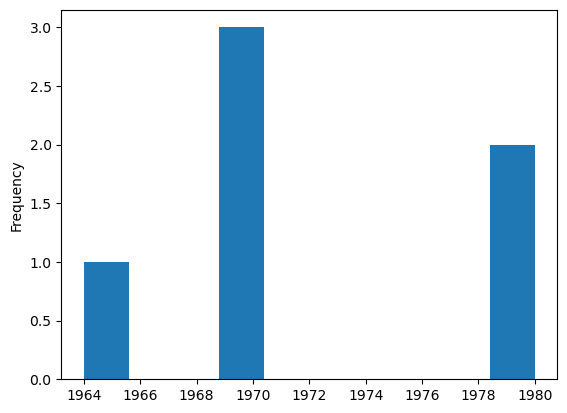

In [126]:
df.Year.plot(kind="hist")

<Axes: xlabel='Colors'>

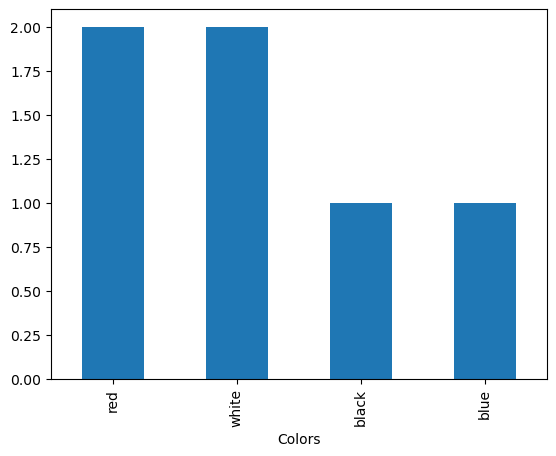

In [127]:
df.Colors.value_counts().plot(kind="bar")

### Comnbining Data: merge(), concat()
-----

`concat():`Concatenate pandas objects along a particular axis.

In [128]:
rs1 = pd.Series(np.random.randn(10), name="Num1")
rs2 = pd.Series(np.random.randn(10), name="Num2")
#axis : {0/'index', 1/'columns'}, default 0
rndDf1 = pd.concat([rs1, rs2], axis=1)
rndDf1

,Num1,Num2
0,0.083602,-0.586172
1,-1.379916,1.656695
2,0.412295,-1.807912
3,-0.668457,-1.465683
4,0.028586,-0.032564
5,0.259638,-0.690410
6,2.551839,0.090902
7,-0.879485,2.541220
8,0.528203,1.535260
9,-1.909311,-0.612339


In [129]:
tmpDf1 = pd.DataFrame({
    'name': ['A', 'B', 'C', 'D'],
    'math': [60,89,82,70],
    'physics': [66,95,83,66],
    'chemistry': [61,91,77,70]
})
tmpDf1

,name,math,physics,chemistry
0,A,60,66,61
1,B,89,95,91
2,C,82,83,77
3,D,70,66,70


In [130]:
tmpDf2 = pd.DataFrame({
    'name': ['E', 'F', 'G', 'H'],
    'math': [66,95,83,66],
    'physics': [60,89,82,70],
    'chemistry': [90,81,78,90]
})
tmpDf2

,name,math,physics,chemistry
0,E,66,60,90
1,F,95,89,81
2,G,83,82,78
3,H,66,70,90


In [131]:
myDf = pd.concat([tmpDf1, tmpDf2])
myDf

,name,math,physics,chemistry
0,A,60,66,61
1,B,89,95,91
2,C,82,83,77
3,D,70,66,70
0,E,66,60,90
1,F,95,89,81
2,G,83,82,78
3,H,66,70,90


In [132]:
myDf.iloc[0]

name          A
math         60
physics      66
chemistry    61
Name: 0, dtype: object

In [133]:
myDf.loc[0]

,name,math,physics,chemistry
0,A,60,66,61
0,E,66,60,90


In [134]:
pd.concat([tmpDf1, tmpDf2], ignore_index=True)

,name,math,physics,chemistry
0,A,60,66,61
1,B,89,95,91
2,C,82,83,77
3,D,70,66,70
4,E,66,60,90
5,F,95,89,81
6,G,83,82,78
7,H,66,70,90


In [135]:
pd.concat([tmpDf1, tmpDf2], axis=1)

,name,math,physics,chemistry,name,math,physics,chemistry
0,A,60,66,61,E,66,60,90
1,B,89,95,91,F,95,89,81
2,C,82,83,77,G,83,82,78
3,D,70,66,70,H,66,70,90


In [136]:
tmpDf1

,name,math,physics,chemistry
0,A,60,66,61
1,B,89,95,91
2,C,82,83,77
3,D,70,66,70


`merge()`: Merge DataFrame or named Series objects with a database-style join.

In [137]:
df_customer = pd.DataFrame({
    'id': [1,2,3,4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
df_customer

,id,name
0,1,Tom
1,2,Jenny
2,3,James
3,4,Dan


In [138]:
df_info = pd.DataFrame({
    'id': [2,3,4,5],
    'age': [31,20,40,70],
    'sex': ['F', 'M', 'M', 'F']
})
df_info

,id,age,sex
0,2,31,F
1,3,20,M
2,4,40,M
3,5,70,F


In [139]:
pd.merge(df_customer, df_info)

,id,name,age,sex
0,2,Jenny,31,F
1,3,James,20,M
2,4,Dan,40,M


In [140]:
# equivlant to 
df_customer.merge(df_info)

,id,name,age,sex
0,2,Jenny,31,F
1,3,James,20,M
2,4,Dan,40,M


In [141]:
# Single key columns
pd.merge(df_customer, df_info, on='id')

,id,name,age,sex
0,2,Jenny,31,F
1,3,James,20,M
2,4,Dan,40,M


## Grouping
------

By “group by” we are referring to a process involving one or more of the following steps:

   - **Splitting** the data into groups based on some criteria

   - **Applying** a function to each group independently

   - **Combining** the results into a data structure

-------

In [142]:
df

,Brand,Electric,Year,Price,Colors
1,Ford,False,1964,370.50,red
2,Maserati,True,1970,234.60,white
3,BMW,False,1980,210.03,black
4,Ford,True,1970,347.90,white
5,Lamborghini,True,1969,543.70,blue
6,Ferrari,False,1980,784.10,red


In [143]:
df.groupby("Electric")
df.groupby(["Electric", "Colors"])

Grouping and then applying the `sum()` function to the resulting groups:

In [144]:
df.groupby("Electric")[["Price"]].sum()

,Price
Electric,
False,1364.63
True,1126.20


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function:

In [145]:
df.groupby(["Electric", "Year"]).sum()

Brand   Price      Colors
Electric Year                                  
False    1964          Ford  370.50         red
         1980    BMWFerrari  994.13    blackred
True     1969   Lamborghini  543.70        blue
         1970  MaseratiFord  582.50  whitewhite

In [146]:
df.groupby(["Electric", "Year"]).max()

Brand  Price Colors
Electric Year                           
False    1964         Ford  370.5    red
         1980      Ferrari  784.1    red
True     1969  Lamborghini  543.7   blue
         1970     Maserati  347.9  white

### Casting
Cast a pandas object to a specified dtype ``dtype``.

In [147]:
df["Electric"] = df["Electric"].astype(int)
df

,Brand,Electric,Year,Price,Colors
1,Ford,0,1964,370.50,red
2,Maserati,1,1970,234.60,white
3,BMW,0,1980,210.03,black
4,Ford,1,1970,347.90,white
5,Lamborghini,1,1969,543.70,blue
6,Ferrari,0,1980,784.10,red


### Broadcasting

In [148]:
s = pd.Series([100.00, 120.00, 101.00, 3.00])
s

0    100.0
1    120.0
2    101.0
3      3.0
dtype: float64

In [149]:
total = 0
for item in s:
    total += item
print(total)

324.0


In [150]:
total = np.sum(s)
print(total)

324.0


In [151]:
#this creates a big series of random numbers
s = pd.Series(np.random.randint(0,1000,10000))
s.head()

0    830
1    447
2    721
3    675
4    435
dtype: int64

In [152]:
len(s)

10000

In [209]:
%%timeit -n 1000
summary = 0
for item in s:
    summary+=item

490 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [211]:
%%timeit -n 1000
summary = np.sum(s)

12.3 µs ± 6.29 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [155]:
s += 2 # adds two to each item in s using broadcasting
s.head()

0    832
1    449
2    723
3    677
4    437
dtype: int64

In [156]:
%%timeit -n 5
s = pd.Series(np.random.randint(0,1000,100))
for i, v in s.items():
    s.loc[i]=  2 + v

1.28 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [157]:
%%timeit -n 10
s = pd.Series(np.random.randint(0,1000,10000))
s += 2

99.2 µs ± 55.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Arithmetic Operations

In [158]:
series[0]=70.0
series[3]=35
series

Ali       70
Veli      88
Ayse      94
Can       35
Zeynep    45
Zehra     74
dtype: int64

In [159]:
series/10

Ali       7.0
Veli      8.8
Ayse      9.4
Can       3.5
Zeynep    4.5
Zehra     7.4
dtype: float64

In [160]:
series//2

Ali       35
Veli      44
Ayse      47
Can       17
Zeynep    22
Zehra     37
dtype: int64

In [161]:
1/rndDf1

,Num1,Num2
0,11.961415,-1.705984
1,-0.724682,0.603611
2,2.425449,-0.553124
3,-1.495982,-0.682276
4,34.981893,-30.708804
5,3.851522,-1.448414
6,0.391874,11.000847
7,-1.137029,0.393512
8,1.893213,0.651356
9,-0.523749,-1.633083


In [162]:
rndDf1*10

,Num1,Num2
0,0.836021,-5.861721
1,-13.799156,16.566950
2,4.122947,-18.079118
3,-6.684572,-14.656831
4,0.285862,-0.325640
5,2.596376,-6.904102
6,25.518392,0.909021
7,-8.794848,25.412195
8,5.282026,15.352598
9,-19.093113,-6.123388


In [163]:
rndDf1.mul(3)

,Num1,Num2
0,0.250806,-1.758516
1,-4.139747,4.970085
2,1.236884,-5.423735
3,-2.005372,-4.397049
4,0.085759,-0.097692
5,0.778913,-2.071231
6,7.655518,0.272706
7,-2.638454,7.623659
8,1.584608,4.605779
9,-5.727934,-1.837016


In [164]:
rndDf1

,Num1,Num2
0,0.083602,-0.586172
1,-1.379916,1.656695
2,0.412295,-1.807912
3,-0.668457,-1.465683
4,0.028586,-0.032564
5,0.259638,-0.690410
6,2.551839,0.090902
7,-0.879485,2.541220
8,0.528203,1.535260
9,-1.909311,-0.612339


In [165]:
np.abs(rndDf1)

,Num1,Num2
0,0.083602,0.586172
1,1.379916,1.656695
2,0.412295,1.807912
3,0.668457,1.465683
4,0.028586,0.032564
5,0.259638,0.690410
6,2.551839,0.090902
7,0.879485,2.541220
8,0.528203,1.535260
9,1.909311,0.612339


In [166]:
rndDf2 = pd.DataFrame(np.random.rand(10, 2), columns=["Num1","Num2"])
rndDf2

,Num1,Num2
0,0.082089,0.906478
1,0.650930,0.837451
2,0.981337,0.713725
3,0.131808,0.352487
4,0.353847,0.478911
5,0.773293,0.023423
6,0.040757,0.473212
7,0.184927,0.048992
8,0.935197,0.261822
9,0.430340,0.748621


In [167]:
rndDf = rndDf1 + rndDf2
rndDf

,Num1,Num2
0,0.165691,0.320306
1,-0.728985,2.494146
2,1.393632,-1.094187
3,-0.536649,-1.113196
4,0.382433,0.446347
5,1.032931,-0.666987
6,2.592596,0.564114
7,-0.694558,2.590212
8,1.463400,1.797081
9,-1.478972,0.136282


In [168]:
rs1

0    0.083602
1   -1.379916
2    0.412295
3   -0.668457
4    0.028586
5    0.259638
6    2.551839
7   -0.879485
8    0.528203
9   -1.909311
Name: Num1, dtype: float64

In [169]:
rndDf.sub(rs1, axis="index")

,Num1,Num2
0,0.082089,0.236704
1,0.650930,3.874062
2,0.981337,-1.506482
3,0.131808,-0.444738
4,0.353847,0.417761
5,0.773293,-0.926624
6,0.040757,-1.987725
7,0.184927,3.469696
8,0.935197,1.268879
9,0.430340,2.045594


In [170]:
dfTmp = rndDf.iloc[1]
dfTmp

Num1   -0.728985
Num2    2.494146
Name: 1, dtype: float64

In [171]:
rndDf.mean(axis="index")

Num1    0.359152
Num2    0.547412
dtype: float64

In [172]:
rndDf.mean(axis="columns")

0    0.242999
1    0.882580
2    0.149722
3   -0.824922
4    0.414390
5    0.182972
6    1.578355
7    0.947827
8    1.630241
9   -0.671345
dtype: float64

In [173]:
rndDf.count()

Num1    10
Num2    10
dtype: int64

In [174]:
rndDf.sum()

Num1    3.591520
Num2    5.474119
dtype: float64

In [175]:
rndDf.min()

Num1   -1.478972
Num2   -1.113196
dtype: float64

In [176]:
rndDf.max()

Num1    2.592596
Num2    2.590212
dtype: float64

In [177]:
rndDf.describe()

,Num1,Num2
count,10.000000,10.000000
mean,0.359152,0.547412
std,1.258095,1.361486
min,-1.478972,-1.113196
25%,-0.655080,-0.466170
50%,0.274062,0.383326
75%,1.303457,1.488839
max,2.592596,2.590212


### apply(), transform()

- 3 main differences

    1. `transform()` can take a function, a string function, a list of functions, and a dict. However, `apply()` is only allowed a function.
    2. `transform()` cannot produce aggregated results
    3. `apply()` works with multiple Series at a time. However, `transform()` is only allowed to work with a single Series at a time.

In [178]:
rndDf

,Num1,Num2
0,0.165691,0.320306
1,-0.728985,2.494146
2,1.393632,-1.094187
3,-0.536649,-1.113196
4,0.382433,0.446347
5,1.032931,-0.666987
6,2.592596,0.564114
7,-0.694558,2.590212
8,1.463400,1.797081
9,-1.478972,0.136282


In [179]:
def myFunc(x):
    return x**2

In [180]:
df1 = rndDf.apply(myFunc)
df1

,Num1,Num2
0,0.027454,0.102596
1,0.531420,6.220765
2,1.942209,1.197245
3,0.287992,1.239205
4,0.146255,0.199226
5,1.066947,0.444871
6,6.721556,0.318224
7,0.482410,6.709197
8,2.141539,3.229501
9,2.187357,0.018573


In [181]:
def myFunc1(x):
    return x*2
df1=rndDf.transform(myFunc1)
df1

,Num1,Num2
0,0.331383,0.640612
1,-1.457971,4.988292
2,2.787263,-2.188374
3,-1.073298,-2.226391
4,0.764867,0.892694
5,2.065862,-1.333974
6,5.185193,1.128228
7,-1.389115,5.180423
8,2.926800,3.594163
9,-2.957943,0.272564


In [182]:
## lambda equivalent
df2=rndDf.transform(lambda x: x*10)
df2=df2.apply(lambda x: x.abs())
df2

,Num1,Num2
0,1.656914,3.203060
1,7.289853,24.941462
2,13.936317,10.941871
3,5.366488,11.131957
4,3.824334,4.463469
5,10.329310,6.669868
6,25.925963,5.641139
7,6.945577,25.902117
8,14.633999,17.970813
9,14.789717,1.362822


In [183]:
# A string function
df2.transform('sqrt')

,Num1,Num2
0,1.287212,1.789710
1,2.699973,4.994143
2,3.733138,3.307850
3,2.316568,3.336459
4,1.955590,2.112692
5,3.213924,2.582609
6,5.091754,2.375108
7,2.635446,5.089412
8,3.825441,4.239200
9,3.845740,1.167400


In [184]:
# A list of functions
df2.transform([np.sqrt, np.exp])

Num1                    Num2              
       sqrt           exp      sqrt           exp
0  1.287212  5.243103e+00  1.789710  2.460773e+01
1  2.699973  1.465355e+03  4.994143  6.791085e+10
2  3.733138  1.128406e+06  3.307850  5.649292e+04
3  2.316568  2.141096e+02  3.336459  6.831994e+04
4  1.955590  4.580227e+01  2.112692  8.678809e+01
5  3.213924  3.061699e+04  2.582609  7.882914e+02
6  5.091754  1.817618e+11  2.375108  2.817835e+02
7  2.635446  1.038546e+03  5.089412  1.774788e+11
8  3.825441  2.267070e+06  4.239200  6.377124e+07
9  3.845740  2.649065e+06  1.167400  3.907203e+00

In [185]:
rndDf

,Num1,Num2
0,0.165691,0.320306
1,-0.728985,2.494146
2,1.393632,-1.094187
3,-0.536649,-1.113196
4,0.382433,0.446347
5,1.032931,-0.666987
6,2.592596,0.564114
7,-0.694558,2.590212
8,1.463400,1.797081
9,-1.478972,0.136282


In [186]:
myLmd = lambda x:x.max()-x.min()
rndDf.apply(myLmd)

Num1    4.071568
Num2    3.703407
dtype: float64

In [187]:
myRndDf = pd.DataFrame(np.random.rand(5, 2), columns=["Nm1","Nm2"])

myLmd=lambda x:x.max()-x.min()

In [188]:
myRndDf

,Nm1,Nm2
0,0.567333,0.549059
1,0.391099,0.676718
2,0.836112,0.025763
3,0.636445,0.697819
4,0.728968,0.864296


In [189]:
myRndDf.apply(myLmd, axis=1)

0    0.018273
1    0.285619
2    0.810349
3    0.061375
4    0.135328
dtype: float64

## Sorting and Ranking

In [190]:
rs = pd.Series(np.random.randn(5), index=["c", "e", "a", "d", "b"])
rs

c   -0.354792
e   -0.369966
a    1.208871
d    0.146097
b   -0.547504
dtype: float64

In [191]:
rs.sort_index()

a    1.208871
b   -0.547504
c   -0.354792
d    0.146097
e   -0.369966
dtype: float64

In [192]:
# NaN: Not a Number
rs[2]=np.nan
rs

c   -0.354792
e   -0.369966
a         NaN
d    0.146097
b   -0.547504
dtype: float64

In [193]:
rs.sort_values()

b   -0.547504
e   -0.369966
c   -0.354792
d    0.146097
a         NaN
dtype: float64

In [194]:
df.sort_index(axis=0)

,Brand,Electric,Year,Price,Colors
1,Ford,0,1964,370.50,red
2,Maserati,1,1970,234.60,white
3,BMW,0,1980,210.03,black
4,Ford,1,1970,347.90,white
5,Lamborghini,1,1969,543.70,blue
6,Ferrari,0,1980,784.10,red


In [195]:
df.sort_index(axis=1)

,Brand,Colors,Electric,Price,Year
1,Ford,red,0,370.50,1964
2,Maserati,white,1,234.60,1970
3,BMW,black,0,210.03,1980
4,Ford,white,1,347.90,1970
5,Lamborghini,blue,1,543.70,1969
6,Ferrari,red,0,784.10,1980


In [196]:
df.sort_index(axis=1, ascending=False)

,Year,Price,Electric,Colors,Brand
1,1964,370.50,0,red,Ford
2,1970,234.60,1,white,Maserati
3,1980,210.03,0,black,BMW
4,1970,347.90,1,white,Ford
5,1969,543.70,1,blue,Lamborghini
6,1980,784.10,0,red,Ferrari


In [197]:
df.sort_values(by="Price")

,Brand,Electric,Year,Price,Colors
3,BMW,0,1980,210.03,black
2,Maserati,1,1970,234.60,white
4,Ford,1,1970,347.90,white
1,Ford,0,1964,370.50,red
5,Lamborghini,1,1969,543.70,blue
6,Ferrari,0,1980,784.10,red


## Write & Read

In [198]:
df

,Brand,Electric,Year,Price,Colors
1,Ford,0,1964,370.50,red
2,Maserati,1,1970,234.60,white
3,BMW,0,1980,210.03,black
4,Ford,1,1970,347.90,white
5,Lamborghini,1,1969,543.70,blue
6,Ferrari,0,1980,784.10,red


In [199]:
df.to_csv("myDataFrame.csv")

In [200]:
myDf = pd.read_csv("myDataFrame.csv")
myDf

,Unnamed: 0,Brand,Electric,Year,Price,Colors
0,1,Ford,0,1964,370.50,red
1,2,Maserati,1,1970,234.60,white
2,3,BMW,0,1980,210.03,black
3,4,Ford,1,1970,347.90,white
4,5,Lamborghini,1,1969,543.70,blue
5,6,Ferrari,0,1980,784.10,red


In [201]:
myDf=pd.read_csv("myDataFrame.csv", index_col=0)
myDf

,Brand,Electric,Year,Price,Colors
1,Ford,0,1964,370.50,red
2,Maserati,1,1970,234.60,white
3,BMW,0,1980,210.03,black
4,Ford,1,1970,347.90,white
5,Lamborghini,1,1969,543.70,blue
6,Ferrari,0,1980,784.10,red


In [202]:
df.to_csv("myDataFrame.csv", index=False)

In [203]:
myDf=pd.read_csv("myDataFrame.csv")
myDf

,Brand,Electric,Year,Price,Colors
0,Ford,0,1964,370.50,red
1,Maserati,1,1970,234.60,white
2,BMW,0,1980,210.03,black
3,Ford,1,1970,347.90,white
4,Lamborghini,1,1969,543.70,blue
5,Ferrari,0,1980,784.10,red


In [204]:
myDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     6 non-null      object 
 1   Electric  6 non-null      int64  
 2   Year      6 non-null      int64  
 3   Price     6 non-null      float64
 4   Colors    6 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 372.0+ bytes


In [205]:
myDf.describe()

,Electric,Year,Price
count,6.000000,6.000000,6.000000
mean,0.500000,1972.166667,415.138333
std,0.547723,6.462714,216.258136
min,0.000000,1964.000000,210.030000
25%,0.000000,1969.250000,262.925000
50%,0.500000,1970.000000,359.200000
75%,1.000000,1977.500000,500.400000
max,1.000000,1980.000000,784.100000


# Work on Real Data




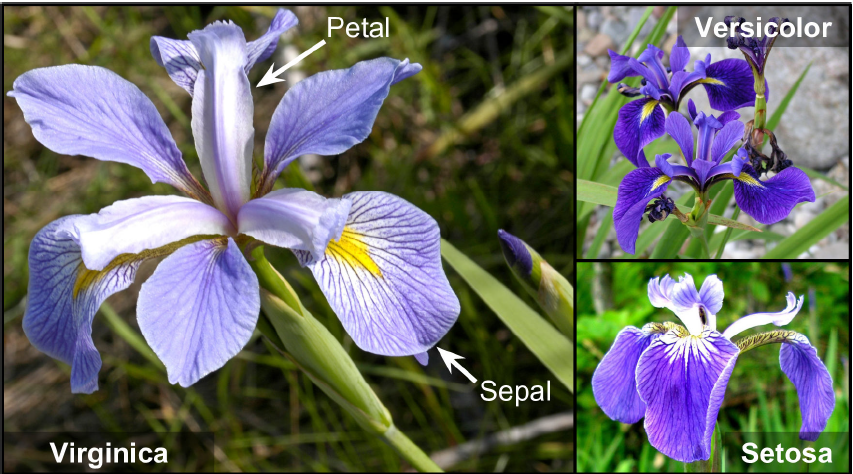

In [206]:
from IPython.display import Image
Image("iris_flower_with_species.png")


 Species: "setosa, versicolor, virginica" 
 
**sepal-length:** alt yaprak uzunluğu cm, 

**sepal-with:** alt yaprak genişliği cm, 

**pedal-length:** üst yaprak genişliği cm, 

**pedal-width:** üst yaprak uzunluğu cm 

**Amaç** iris çiçeğinin dört niteliğini kullanarak hangi türe ait olduğunu tahmin etmek. 

In [207]:
fileDir = "../Data/Iris.csv"

In [208]:
irisData = pd.read_csv(fileDir)

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Iris.csv'

In [ ]:
irisData

In [ ]:
irisData.head()

In [ ]:
irisData.tail()

In [ ]:
irisData.columns

In [ ]:
irisData["SepalLengthCm"].sort_values(ascending=False)

In [ ]:
irisData.sort_values("SepalLengthCm")

In [ ]:
irisData.info()

In [ ]:
irisData.describe()